# Continuous Methods

In [1]:
# imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from pydataset import data

initiated datasets repo at: /Users/instructor/.pydataset/


### Visualize:

### Ascombe's Quartet:

In [3]:
url = "https://gist.githubusercontent.com/ryanorsinger/6218f5731f3df7cb4771ff3879fdeaa3/raw/88cb6bed276e2236c33df011bd753b6c73832c30/quartet.csv"

df = pd.read_csv(url)

In [4]:
# peek at the head, what this data set looks like
df.head()

,id,dataset,x,y
0,0,I,10.0,8.04
1,1,I,8.0,6.95
2,2,I,13.0,7.58
3,3,I,9.0,8.81
4,4,I,11.0,8.33


In [5]:
df.dataset.value_counts()

dataset
I      11
II     11
III    11
IV     11
Name: count, dtype: int64

In [6]:
df.groupby('dataset').describe()

id                                                   x       ...  \
        count  mean       std   min   25%   50%   75%   max count mean  ...   
dataset                                                                 ...   
I        11.0   5.0  3.316625   0.0   2.5   5.0   7.5  10.0  11.0  9.0  ...   
II       11.0  16.0  3.316625  11.0  13.5  16.0  18.5  21.0  11.0  9.0  ...   
III      11.0  27.0  3.316625  22.0  24.5  27.0  29.5  32.0  11.0  9.0  ...   
IV       11.0  38.0  3.316625  33.0  35.5  38.0  40.5  43.0  11.0  9.0  ...   

                        y                                                      
          75%   max count      mean       std   min    25%   50%   75%    max  
dataset                                                                        
I        11.5  14.0  11.0  7.500909  2.031568  4.26  6.315  7.58  8.57  10.84  
II       11.5  14.0  11.0  7.500909  2.031657  3.10  6.695  8.14  8.95   9.26  
III      11.5  14.0  11.0  7.500000  2.030424  5.39  6.250  7.11  7.98  12.74  
IV        8.0  19.0  11.0  7.500909  2.030579  5.25  6.170  7.04  8.19  12.50  

[4 rows x 24 columns]

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


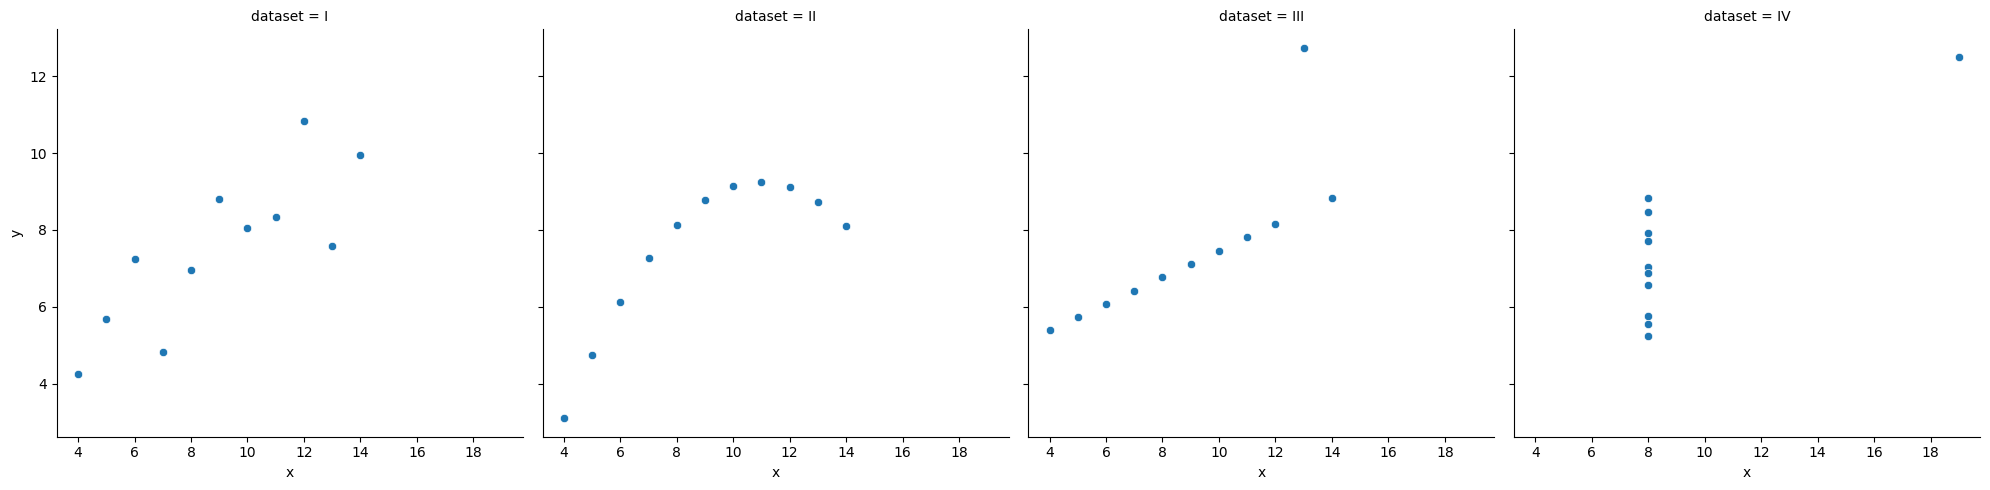

In [7]:
sns.relplot(x='x', y='y', col='dataset', data=df)

<Axes: >

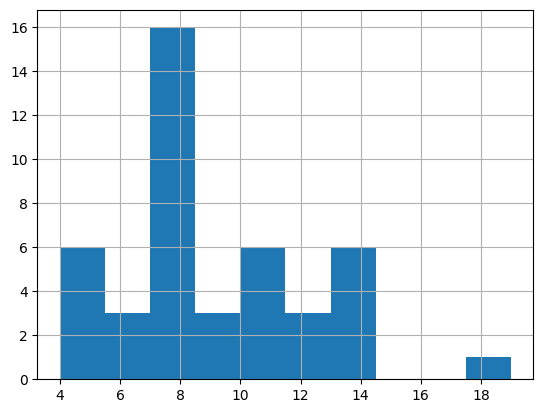

In [8]:
df['x'].hist()

In [9]:
# load up the swiss data set

In [10]:
df = data('swiss')

In [11]:
df.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [12]:
# get the stats via describe

In [13]:
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [14]:
df.describe()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


In [15]:
# histograms

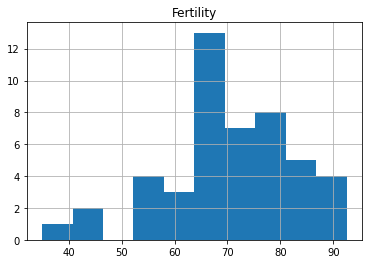

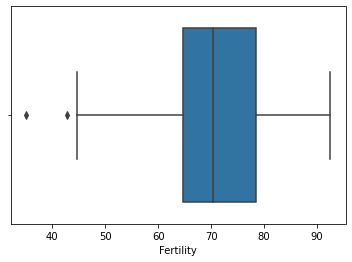

--------


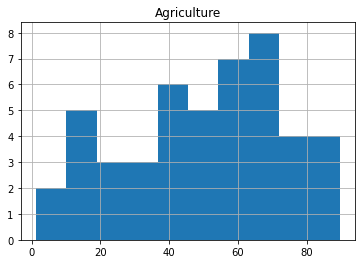

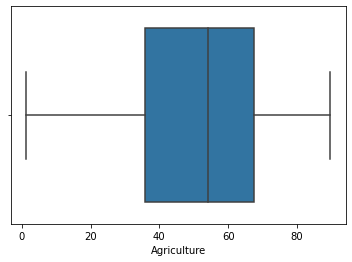

--------


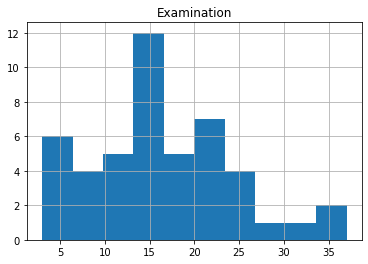

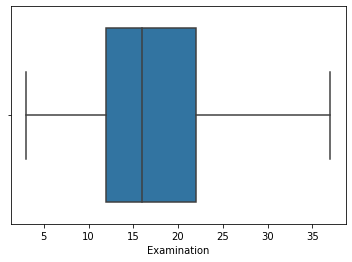

--------


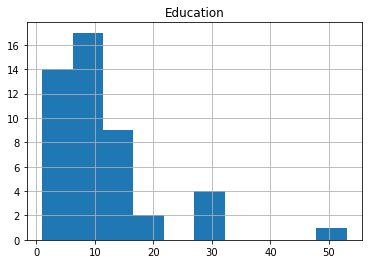

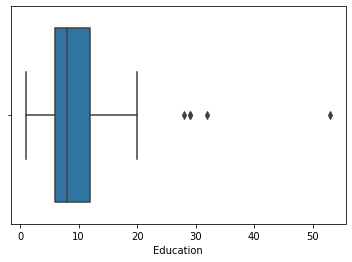

--------


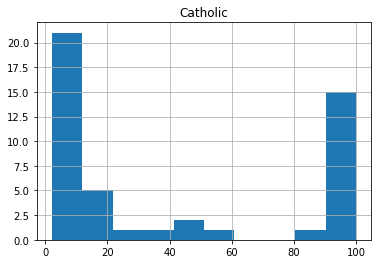

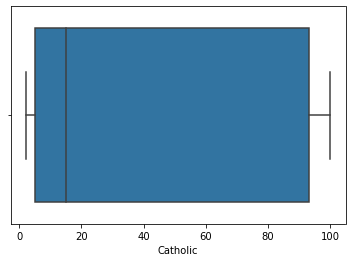

--------


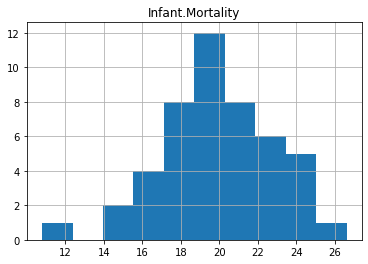

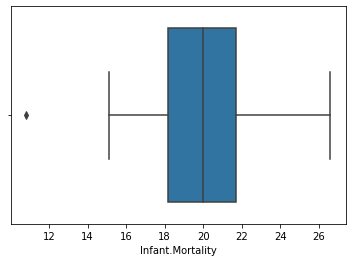

--------


In [16]:
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        df[col].hist()
        plt.title(col)
        plt.show()
        sns.boxplot(data=df, x=col, whis=1.5)
        plt.show()
        print('--------')

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


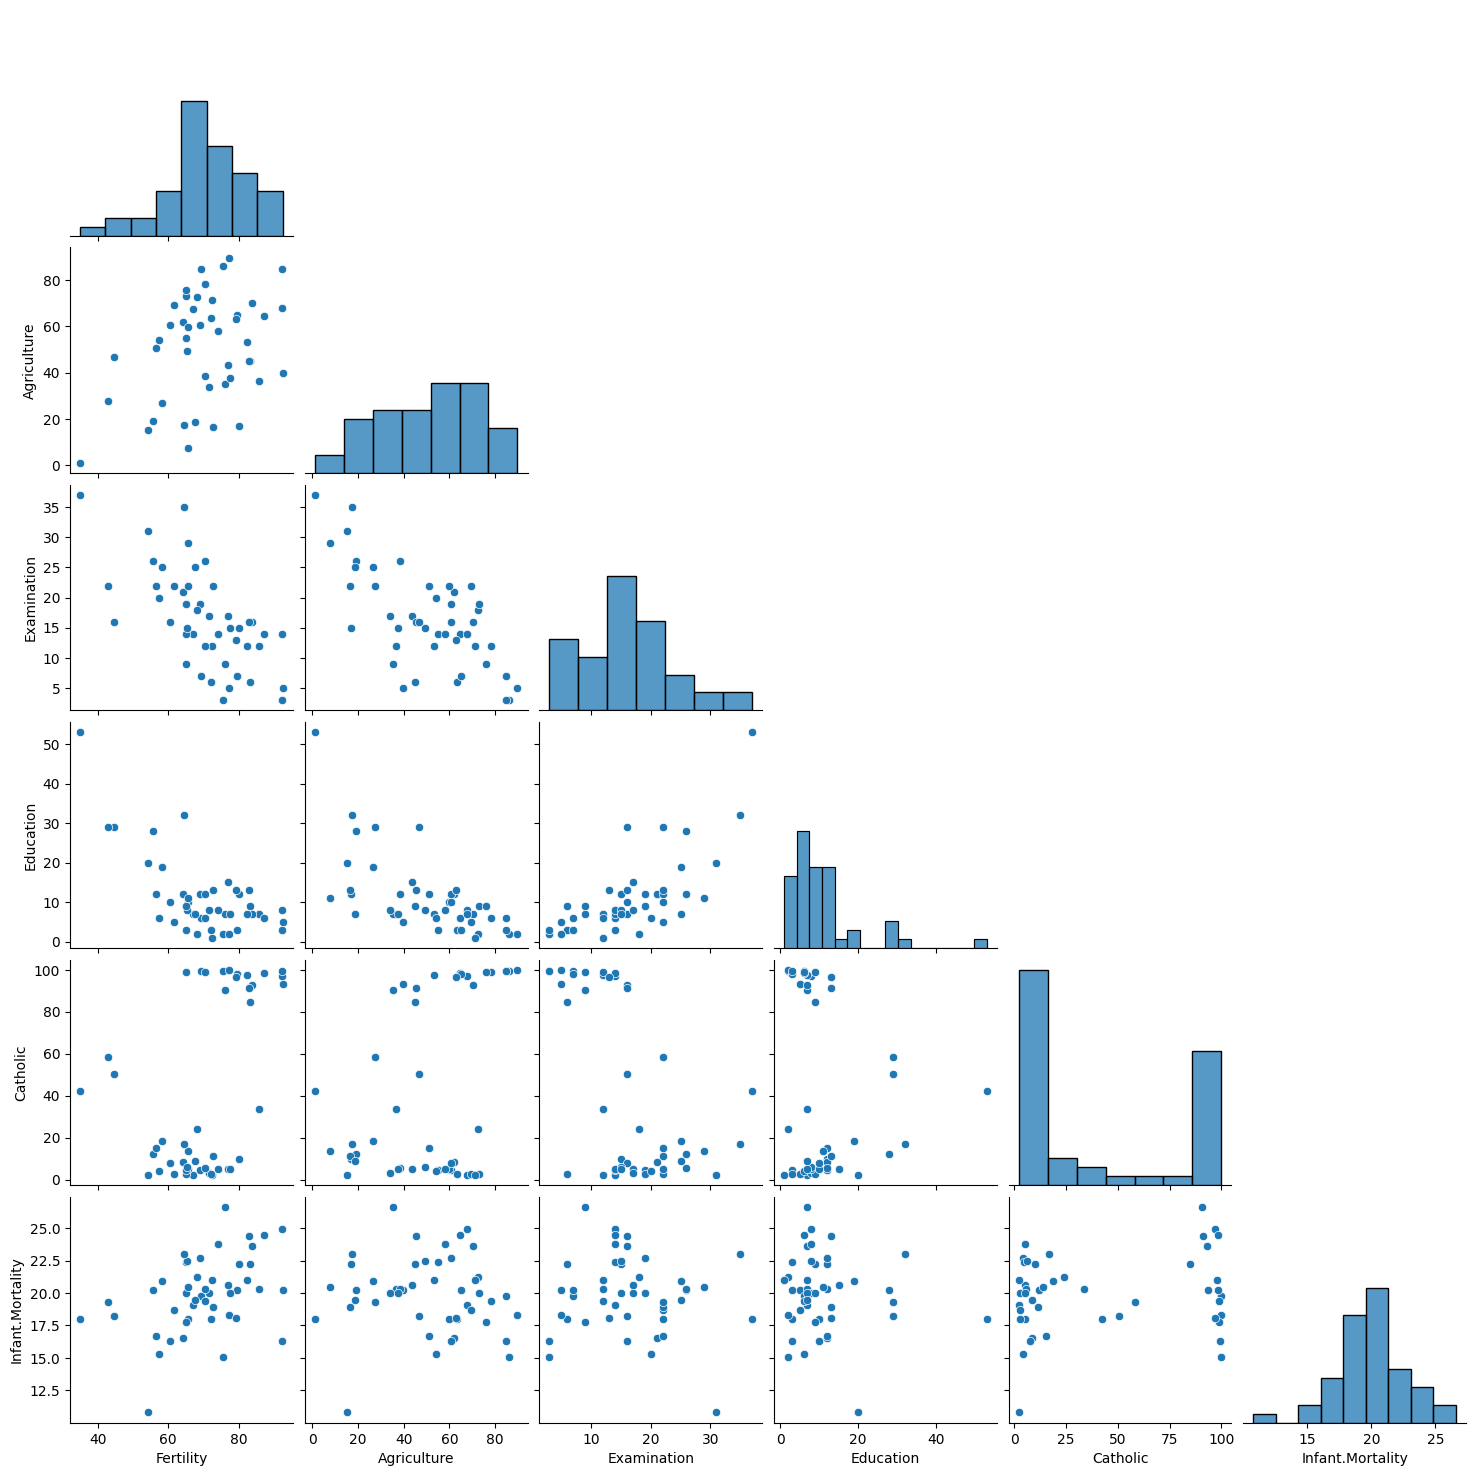

In [16]:
sns.pairplot(df, corner=True)

### Using z-score

### Exponential Tails of the Normal Distribution
| Range | Expected Fraction of Population Inside Range | Approximate Expected Frequency Outside Range | Approximate frequency for daily event |
| ----- | -------------------------------------------- | -------------------------------------------- | -------------------------------------------- |
| μ ± 0.5σ | 0.382924922548026                            | 2 in 3 |Four or five times a week|
| μ ± σ | 0.682689492137086 | 1 in 3 |Twice a week|
| μ ± 1.5σ | 0.866385597462284 | 1 in 7 |Weekly|
| μ ± 2σ | 0.954499736103642 | 1 in 22 |Every three weeks|
| μ ± 2.5σ | 0.987580669348448 | 1 in 81 |Quarterly|
| μ ± 3σ | 0.997300203936740 | 1 in 370 |Yearly|
| μ ± 3.5σ | 0.999534741841929 | 1 in 2149 |Every 6 years|
| μ ± 4σ | 0.999936657516334 | 1 in 15,787 |Every 43 years|
| μ ± 4.5σ | 0.999993204653751 | 1 in 147,160 |Every 403 years|
| μ ± 5σ | 0.999999426696856 | 1 in 744,278 |Every 4776 years|
| μ ± 5.5σ | 0.999999962020875 | 1 in 26,330,254 |Every 72,090 years|
| μ ± 6σ | 0.999999998026825 | 1 in 506,797,346 |Every 1.38 million years|

### Using IQR

In [17]:
# steps to defining IQR method:
# get the Q1 and Q3 values
# determine our multiplier
# use these qualities to assert abnormalities

In [18]:
# Let's examine examination

In [19]:
df.Examination.quantile(0.25)

12.0

In [20]:
# start with an inner fence calculation
multiplier = 1.5
# calculate our q1 and q3
q1 = df.Examination.quantile(0.25)
q3 = df.Examination.quantile(0.75)
iqr = q3 - q1

In [21]:
q1, q3, iqr

(12.0, 22.0, 10.0)

In [22]:
# inner or outer: 1.5 fence multiplier convention for inner, 3.0 mult convention for outer
# lower: q1 - mult* iqr
# upper: q3 + iqr*mult

In [23]:
inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

In [24]:
df[(df['Examination'] < inner_lower_fence) |  (df['Examination'] > inner_upper_fence)]

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality


In [25]:
# z-score:
# subtract the data point from the mean, divide by the standard deviation

In [26]:
# Let's switch to Infant Mortality

In [27]:
# remember our z score calculation:
#  (x - x_mean) / x_std

In [28]:
z_scores = (df['Infant.Mortality'] - df['Infant.Mortality'].mean()) / df['Infant.Mortality'].std()

In [29]:
z_scores

Courtelary      0.775037
Delemont        0.775037
Franches-Mnt    0.088388
Moutier         0.122720
Neuveville      0.225718
Porrentruy      2.285664
Broye           1.255691
Glane           1.702013
Gruyere         0.363047
Sarine          1.530350
Veveyse         1.564683
Aigle          -1.181913
Aubonne        -0.289269
Avenches        0.946699
Cossonay       -0.426599
Echallens       0.431712
Grandson        0.019723
Lausanne        0.088388
La Vallee      -3.138862
Lavaux          0.019723
Morges         -0.666926
Moudon          0.843702
Nyone          -1.113248
Orbe           -1.593902
Oron            0.363047
Payerne         1.324356
Paysd'enhaut   -0.666926
Rolle          -1.250578
Vevey           0.328715
Yverdon         0.878034
Conthey        -1.662567
Entremont      -0.048942
Herens         -0.563929
Martigwy       -0.186272
Monthey         0.088388
St Maurice     -0.735591
Sierre         -1.250578
Sion           -0.632594
Boudry          0.122720
La Chauxdfnd    0.191385


In [30]:
df['infant_mortality_zscores'] = z_scores

In [31]:
# do the same thing for z scores but with examination again

In [32]:
df[df['infant_mortality_zscores'].abs() >= 3]

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,infant_mortality_zscores
La Vallee,54.3,15.2,31,20,2.15,10.8,-3.138862


In [33]:
z_scores = (df['Examination'] - df['Examination'].mean()) / df['Examination'].std()

In [34]:
df['examination_zscores'] = z_scores

In [35]:
df[df['examination_zscores'].abs() >= 2]

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,infant_mortality_zscores,examination_zscores
Neuchatel,64.4,17.6,35,32,16.92,23.0,1.049696,2.320244
V. De Geneve,35.0,1.2,37,53,42.34,18.0,-0.666926,2.570937


In [36]:
multiplier = 3
q1 = df['Infant.Mortality'].quantile(0.25)
q3 = df['Infant.Mortality'].quantile(0.75)
iqr = q3 - q1

In [37]:
outer_lower_fence = q1 - (multiplier * iqr)
outer_upper_fence = q3 + (multiplier * iqr)

In [38]:
df[(df['Infant.Mortality'] < outer_lower_fence) | (df['Infant.Mortality'] > outer_upper_fence)]

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,infant_mortality_zscores,examination_zscores


In [42]:
outer_upper_fence

32.35

In [41]:
df['Infant.Mortality']

Courtelary      22.2
Delemont        22.2
Franches-Mnt    20.2
Moutier         20.3
Neuveville      20.6
Porrentruy      26.6
Broye           23.6
Glane           24.9
Gruyere         21.0
Sarine          24.4
Veveyse         24.5
Aigle           16.5
Aubonne         19.1
Avenches        22.7
Cossonay        18.7
Echallens       21.2
Grandson        20.0
Lausanne        20.2
La Vallee       10.8
Lavaux          20.0
Morges          18.0
Moudon          22.4
Nyone           16.7
Orbe            15.3
Oron            21.0
Payerne         23.8
Paysd'enhaut    18.0
Rolle           16.3
Vevey           20.9
Yverdon         22.5
Conthey         15.1
Entremont       19.8
Herens          18.3
Martigwy        19.4
Monthey         20.2
St Maurice      17.8
Sierre          16.3
Sion            18.1
Boudry          20.3
La Chauxdfnd    20.5
Le Locle        18.9
Neuchatel       23.0
Val de Ruz      20.0
ValdeTravers    19.5
V. De Geneve    18.0
Rive Droite     18.2
Rive Gauche     19.3
Name: Infant.